In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import category_encoders
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading Data

In [2]:
data = pd.read_csv("../dataset/dataset_1.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Pessoas_Residencia
count,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06
mean,1.068437e+00,2.139332e+00,1.393362e+00,1.448745e+00,5.267554e-01,2.195807e+01,2.864464e+00,3.894421e+00
std,4.162319e-01,1.012140e+00,5.084028e-01,6.148052e-01,4.992837e-01,7.184176e+00,3.970037e+00,1.473758e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,3.000000e+00
50%,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,1.000000e+00,4.000000e+00
75%,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.300000e+01,4.000000e+00,5.000000e+00
max,4.000000e+00,5.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00,9.200000e+01,1.300000e+01,2.000000e+01


## Creating variables

### Region

In [ ]:
def mapea_regioes(data):
    if data["SG_UF_RESIDENCIA"] in ["AM", "RR", "AP", "PA", "TO", "RO", "AC"]:
        return "Norte"
    if data["SG_UF_RESIDENCIA"] in ["MA", "PI", "CE", "RN", "PE", "PB", "SE", "AL", "BA"]:
        return "Nordeste"
    if data["SG_UF_RESIDENCIA"] in ["MT", "MS", "GO", "DF"]:
        return "Centro_Oeste"
    if data["SG_UF_RESIDENCIA"] in ["SP", "RJ", "ES", "MG"]:
        return "Sudeste"
    if data["SG_UF_RESIDENCIA"] in ["PR", "RS", "SC"]:
        return "Sul"
    
data["Regiao"] = data.apply(mapea_regioes, 1)

In [ ]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

ax = sns.histplot(data, x = "DESEMPENHO_BAIXO", hue = "Regiao", binwidth=1, discrete= True, multiple="stack", palette = "mako")
plt.xlabel("Variável Alvo")
plt.ylabel("")

### House Income per capita

In [3]:
def mapea_per_capta(data):
    renda = data["Renda_Mensal"]
    capta = data["Pessoas_Residencia"]
    if renda == "A":
        return 0
    if renda == "B":
        return 998/capta    
    if renda == "C":
        return 1497/capta
    if renda == "D":
        return 1996/capta  
    if renda == "E":
        return 2495/capta  
    if renda == "F":
        return 2994/capta   
    if renda == "G":
        return 3992/capta
    if renda == "H":
        return 4990/capta 
    if renda == "I":
        return 5988/capta
    if renda == "J":
        return 6986/capta  
    if renda == "K":
        return 7984/capta  
    if renda == "L":
        return 8982/capta  
    if renda == "M":
        return 9980/capta
    if renda == "N":
        return 11976/capta 
    if renda == "O":
        return 14970/capta
    if renda == "P":
        return 19960/capta
    if renda == "Q":
        return 30000/capta 
    
data["Renda_per_capta"] = data.apply(mapea_per_capta, 1)

Text(0, 0.5, '')

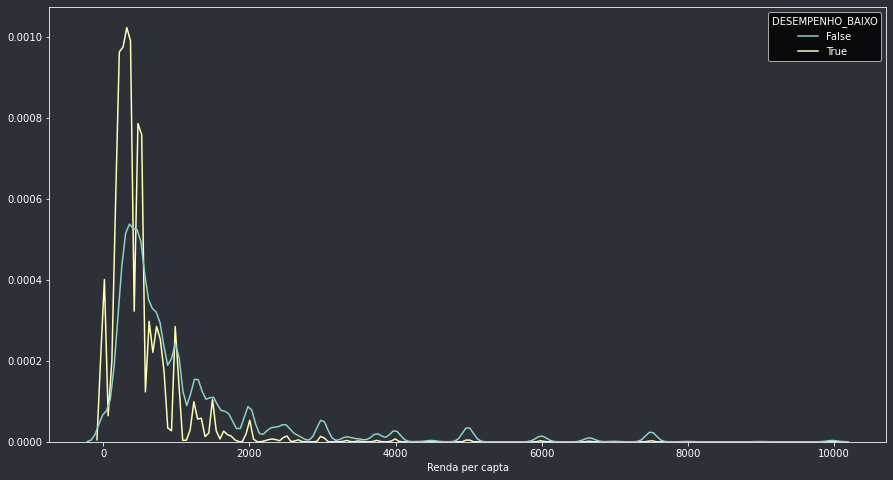

In [4]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.kdeplot(data = data[data["Renda_per_capta"]<10000], x = "Renda_per_capta", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Renda per capta")
plt.ylabel("")

### People per room

In [5]:
def mapea_pessoas_por_quarto(data):
    if data["Quartos"] == "A":
        return 0
    if data["Quartos"] == "B":
        return data["Pessoas_Residencia"]
    if data["Quartos"] == "C":
        return data["Pessoas_Residencia"]/2
    if data["Quartos"] == "D":
        return data["Pessoas_Residencia"]/3
    if data["Quartos"] == "E":
        return data["Pessoas_Residencia"]/4
    
data["Pessoas_por_quarto"] = data.apply(mapea_pessoas_por_quarto, 1)

Text(0, 0.5, '')

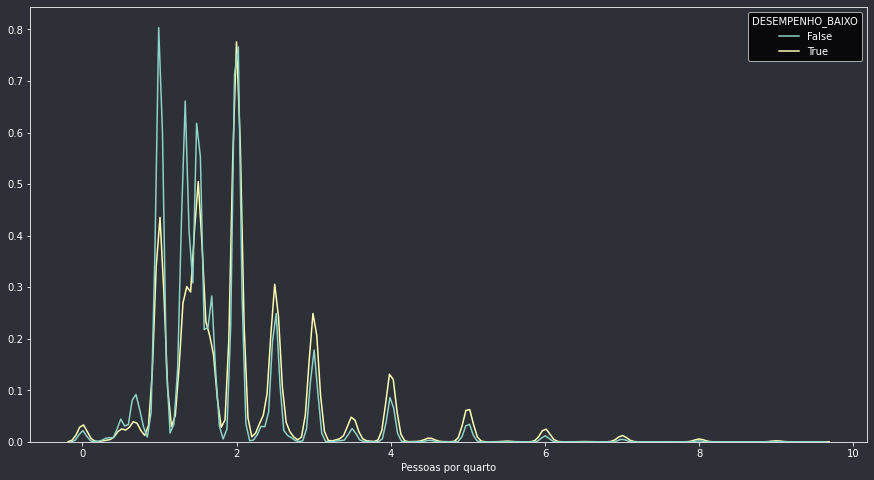

In [6]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.kdeplot(data = data[data["Pessoas_por_quarto"]<10], x = "Pessoas_por_quarto", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Pessoas por quarto")
plt.ylabel("")

### Persons per computer

In [7]:
def mapea_pessoas_por_computador(data):
    if data["Computador"] == "A":
        return 0
    if data["Computador"] == "B":
        return data["Pessoas_Residencia"]
    if data["Computador"] == "C":
        return data["Pessoas_Residencia"]/2
    if data["Computador"] == "D":
        return data["Pessoas_Residencia"]/3
    if data["Computador"] == "E":
        return data["Pessoas_Residencia"]/4
    
data["Pessoas_por_computador"] = data.apply(mapea_pessoas_por_computador, 1)

Text(0, 0.5, '')

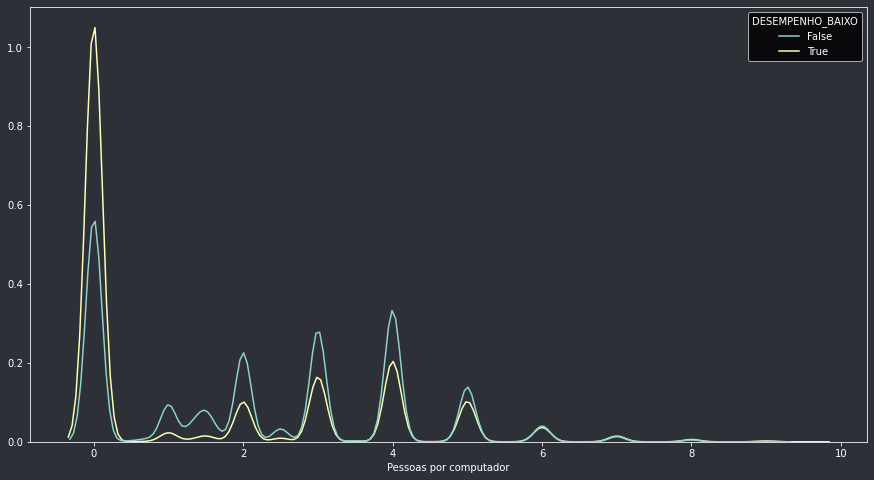

In [8]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.kdeplot(data = data[data["Pessoas_por_computador"]<10], x = "Pessoas_por_computador", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Pessoas por computador")
plt.ylabel("")

### Cellphones per person

In [9]:
def mapea_celulares_por_pessoa(data):
    if data["Celular"] == "A":
        return 0
    if data["Celular"] == "B":
        return 1/data["Pessoas_Residencia"]
    if data["Celular"] == "C":
        return 2/data["Pessoas_Residencia"]
    if data["Celular"] == "D":
        return 3/data["Pessoas_Residencia"]
    if data["Celular"] == "E":
        return 4/data["Pessoas_Residencia"]
    
data["Celulares_por_pessoa"] = data.apply(mapea_celulares_por_pessoa, 1)

Text(0, 0.5, '')

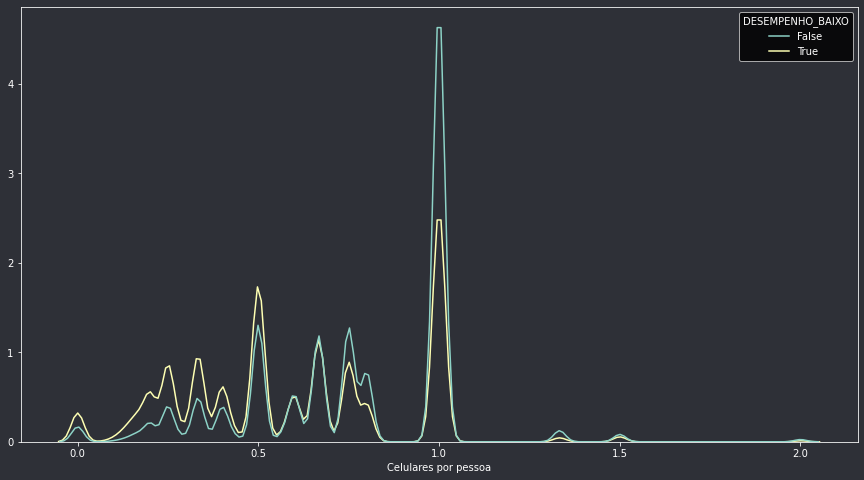

In [10]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.kdeplot(data = data[data["Celulares_por_pessoa"]<2.5], x = "Celulares_por_pessoa", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Celulares por pessoa")
plt.ylabel("")

## Treating variables

In [11]:
data.dtypes

SG_UF_RESIDENCIA           object
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_ST_CONCLUSAO             int64
TP_ESCOLA                   int64
TP_LINGUA                   int64
NU_IDADE                    int64
TP_ANO_CONCLUIU             int64
Escolaridade_Pai           object
Escolaridade_Mae           object
Ocupacao_Pai               object
Ocupacao_Mae               object
Pessoas_Residencia          int64
Renda_Mensal               object
Empregada_Domestica        object
Banheiros                  object
Quartos                    object
Carro                      object
Motocicleta                object
Geladeira                  object
Freezer                    object
Lava_Roupa                 object
Seca_Roupa                 object
Microondas                 object
Lava_Louca                 object
Aspirador                  object
Televisao                  object
DVD                        object
TV_Assinatura 

In [22]:
data[data["Escolaridade_Pai"] == "A"]["Escolaridade_Pai"]

20         A
27         A
69         A
97         A
99         A
          ..
3174247    A
3174273    A
3174280    A
3174295    A
3174298    A
Name: Escolaridade_Pai, Length: 174680, dtype: object

In [43]:
encoder = category_encoders.WOEEncoder(cols="Escolaridade_Pai").fit(data["Escolaridade_Pai"], data["DESEMPENHO_BAIXO"])

In [45]:
encoder.mapping

{'Escolaridade_Pai': Escolaridade_Pai
  1    0.012228
  2    0.423572
  3    0.203686
  4    0.581868
  5   -0.392296
  6   -1.359257
  7    1.107397
  8   -1.707128
 -1    0.000000
 -2    0.000000
 dtype: float64}

In [13]:
encoder.ordinal_encoder

OrdinalEncoder(cols=['Escolaridade_Pai'],
               mapping=[{'col': 'Escolaridade_Pai', 'data_type': dtype('O'),
                         'mapping': D      1
H      2
C      3
B      4
E      5
F      6
A      7
G      8
NaN   -2
dtype: int64}])

### Converting discrete features to numeric by using Weight of Evidence

In [12]:
continuous = ["Renda_per_capta", "Pessoas_por_quarto", "Pessoas_por_computador", "Celulares_por_pessoa", "DESEMPENHO_BAIXO"]

discrete = [col for col in data.columns if col not in continuous]

TARGET = data["DESEMPENHO_BAIXO"]

data = category_encoders.WOEEncoder(cols=discrete).fit_transform(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"])
data["DESEMPENHO_BAIXO"] = TARGET

In [13]:
data.dtypes

SG_UF_RESIDENCIA          float64
TP_SEXO                   float64
TP_ESTADO_CIVIL           float64
TP_COR_RACA               float64
TP_ST_CONCLUSAO           float64
TP_ESCOLA                 float64
TP_LINGUA                 float64
NU_IDADE                  float64
TP_ANO_CONCLUIU           float64
Escolaridade_Pai          float64
Escolaridade_Mae          float64
Ocupacao_Pai              float64
Ocupacao_Mae              float64
Pessoas_Residencia        float64
Renda_Mensal              float64
Empregada_Domestica       float64
Banheiros                 float64
Quartos                   float64
Carro                     float64
Motocicleta               float64
Geladeira                 float64
Freezer                   float64
Lava_Roupa                float64
Seca_Roupa                float64
Microondas                float64
Lava_Louca                float64
Aspirador                 float64
Televisao                 float64
DVD                       float64
TV_Assinatura 

### Saving data

In [14]:
data.to_csv("../dataset/dataset_2.csv", sep = ";")